# World Happiness Report

# Import necessary libraries

In [1]:
#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visulaziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
# load the data set
worldhappiness=pd.read_csv('world_happiness.csv')

In [7]:
worldhappiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Exploratory Data Analysis

In [9]:
worldhappiness.shape

(158, 12)

In [10]:
#Let's check for the missing values
worldhappiness.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

 analysis shows no missing values in data

In [12]:
# Visualization of data using heat maps

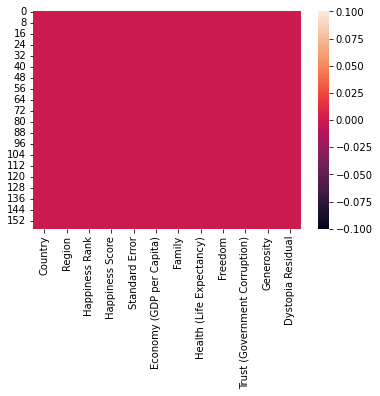

In [13]:
sns.heatmap(worldhappiness.isnull())
plt.show()

In [14]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [16]:

worldhappiness.dropna()
df = worldhappiness._get_numeric_data() #drop non-numeric cols

In [17]:
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [19]:
df.shape

(158, 10)

In [21]:
#Let's begin with our EDA
worldhappiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [24]:
# iterate over each attribute and print values count for it
for key, value in worldhappiness.iteritems():
    print(worldhappiness[key].value_counts(), "\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64 

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64 

82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64 

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64 

0.03780    2
0.03751    2
0.04394    2
0

In [25]:
#let's check the correlation in the data set
worldhappiness.corr()
worldhappiness.corr().style.background_gradient(cmap='coolwarm')

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


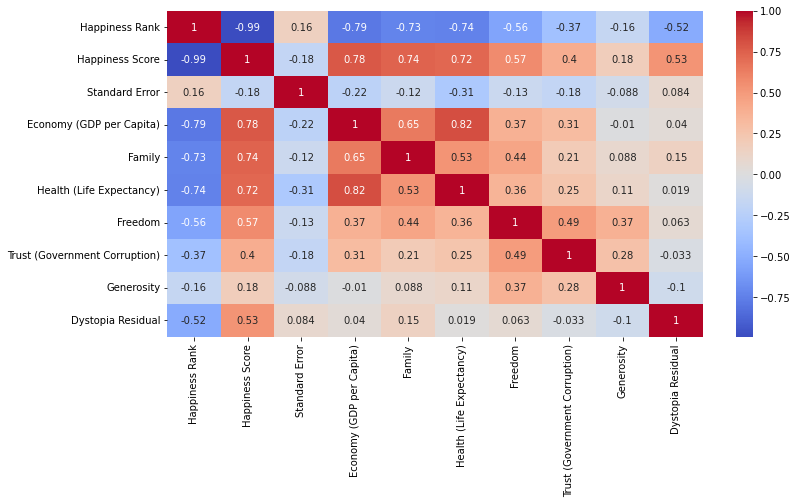

In [27]:
# Let's see the correlation 
plt.figure(figsize=(12,6))
sns.heatmap(worldhappiness.corr(),annot=True,cmap='coolwarm');

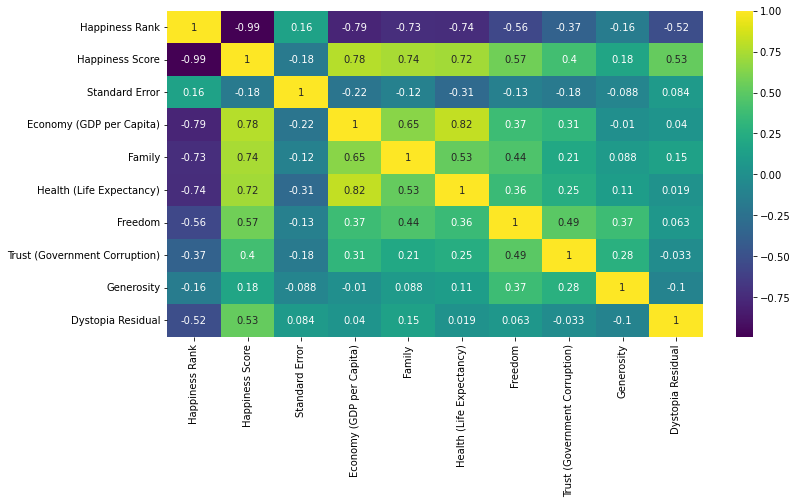

In [28]:
# Let's see the correlation 
plt.figure(figsize=(12,6))
sns.heatmap(worldhappiness.corr(),annot=True,cmap='viridis');

Happiness Score has good correlation with economy, Health, Family Freedom

Happiness Score has moderate correlation with Dystopia Residual Trust in Government

Happiness Score has poor correlation wit Generosity

So we can say that Economy, Health, Family and freedom plays am important role in the happiness of the country where as Transparent government, Generosity will not hav any effect on the chappiness score of the country.

In [29]:
#Let's check the stats metrix 
worldhappiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [30]:
happiness_score=pd.DataFrame(worldhappiness["Happiness Score"])
happiness_score.describe()

,Happiness Score
count,158.000000
mean,5.375734
std,1.145010
min,2.839000
25%,4.526000
50%,5.232500
75%,6.243750
max,7.587000


In [31]:
print('Regions Counts:\n')
print(worldhappiness['Region'].value_counts())

Regions Counts:

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


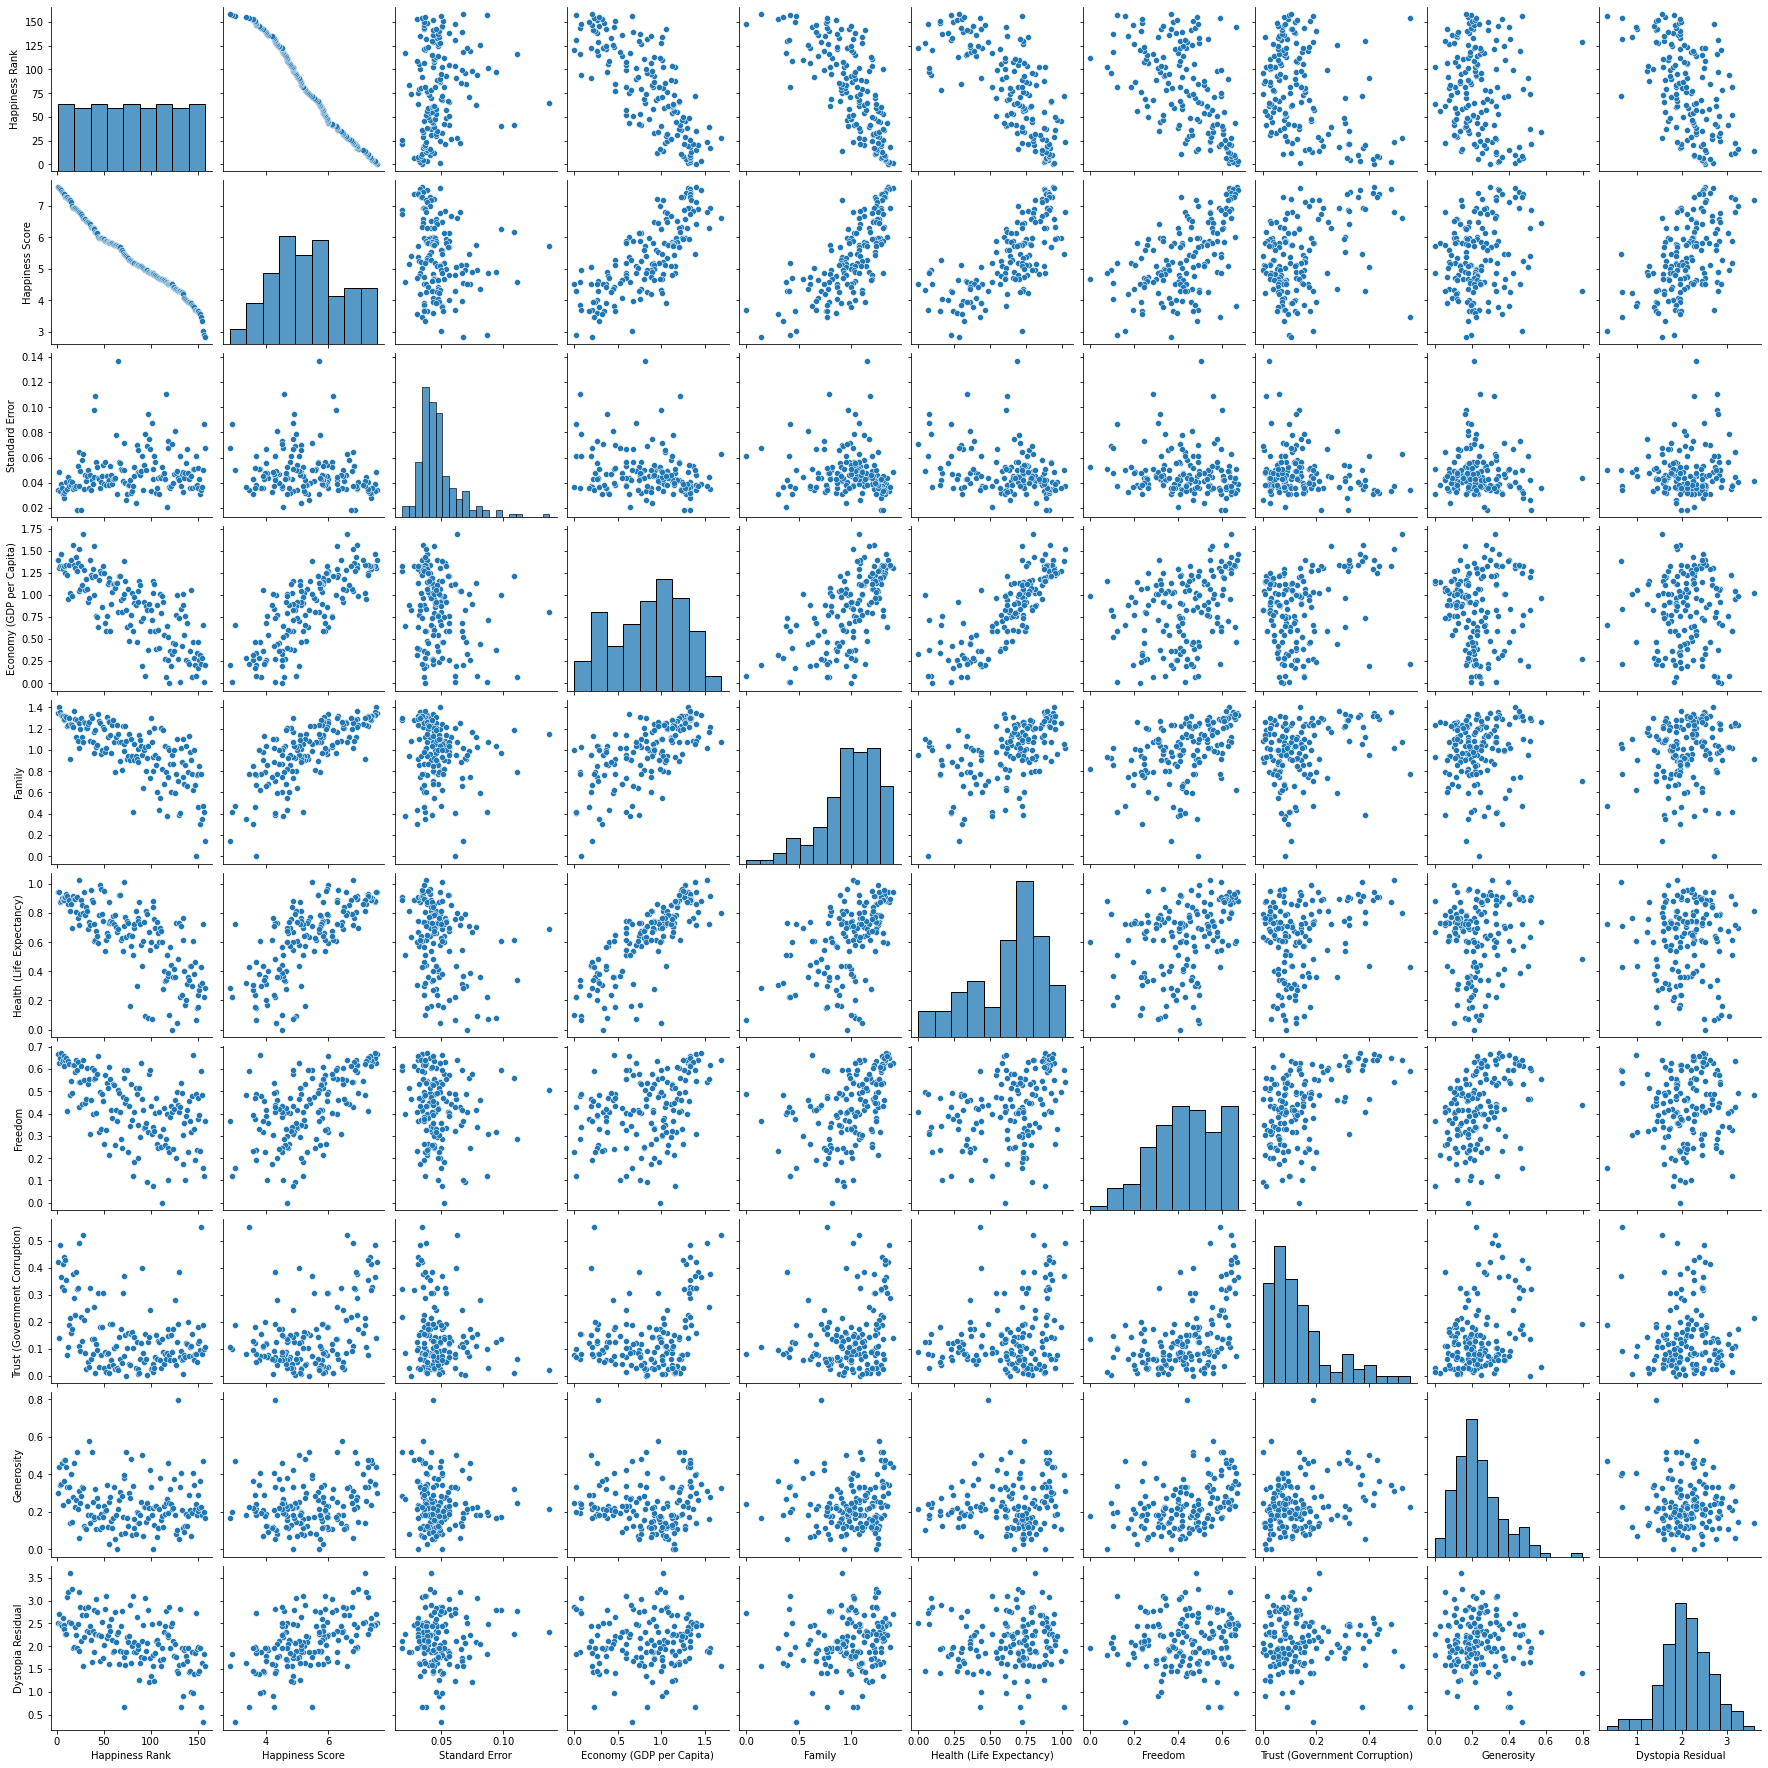

In [33]:
#Let's see the visual charaterstics of the data
sns.pairplot(worldhappiness);

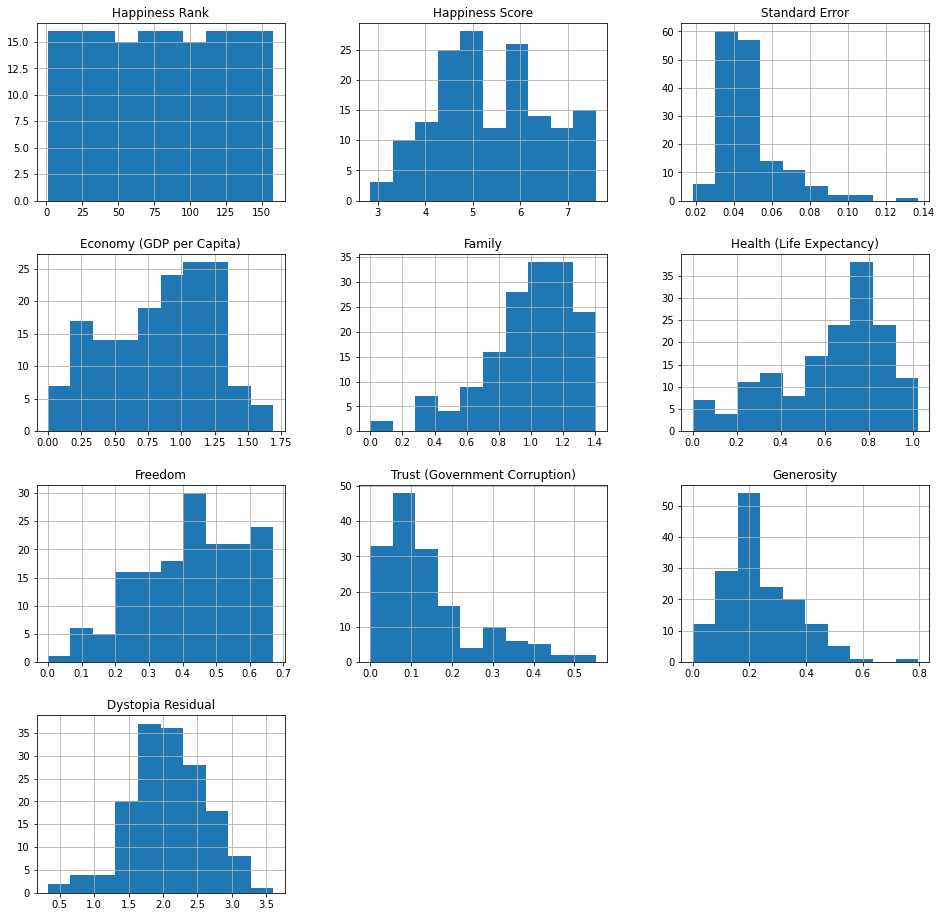

In [34]:
worldhappiness.hist(figsize=(16,16));

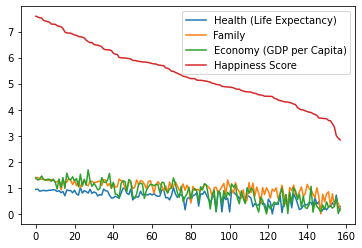

In [35]:
happiness_plot = worldhappiness.loc[:,["Health (Life Expectancy)","Family", "Economy (GDP per Capita)","Happiness Score" ]]
happiness_plot.plot();

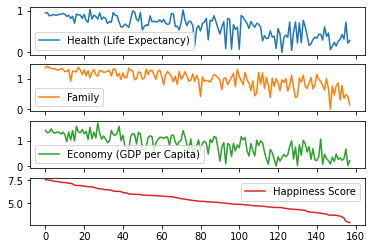

In [36]:
happiness_plot.plot(subplots=True);

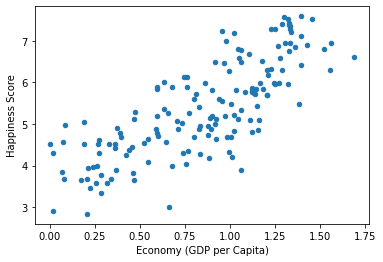

In [37]:
happiness_plot.plot(kind = "scatter", x = "Economy (GDP per Capita)", y = "Happiness Score");

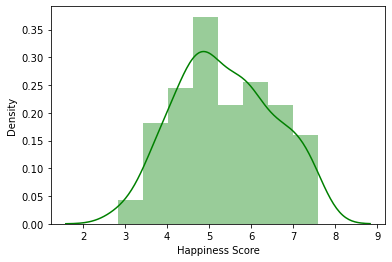

In [45]:
sns.distplot(worldhappiness['Happiness Score'],color='g');

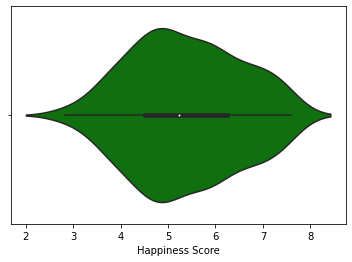

In [46]:
sns.violinplot(worldhappiness['Happiness Score'],color='g');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

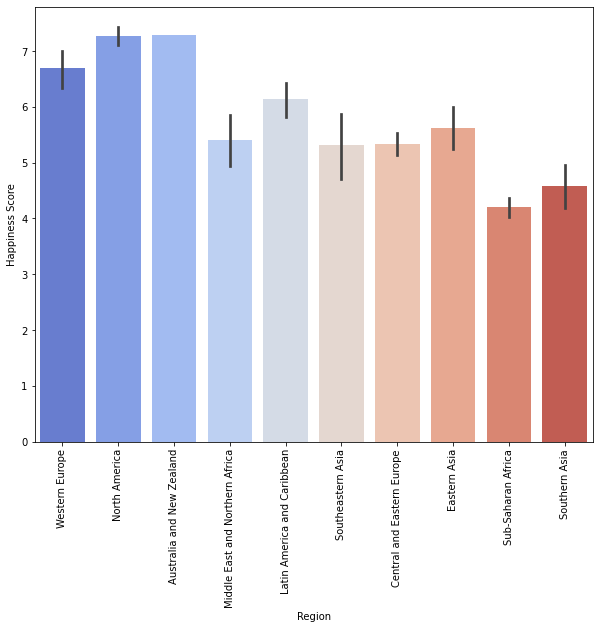

In [47]:
fig=plt.figure(figsize=(10,8))
sns.barplot(x='Region',y='Happiness Score',data=worldhappiness, palette='coolwarm');
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=90)

From analysis we can see that Western europe, north america, Australia ad newzealand are happiest contries among all.

<Figure size 432x432 with 0 Axes>

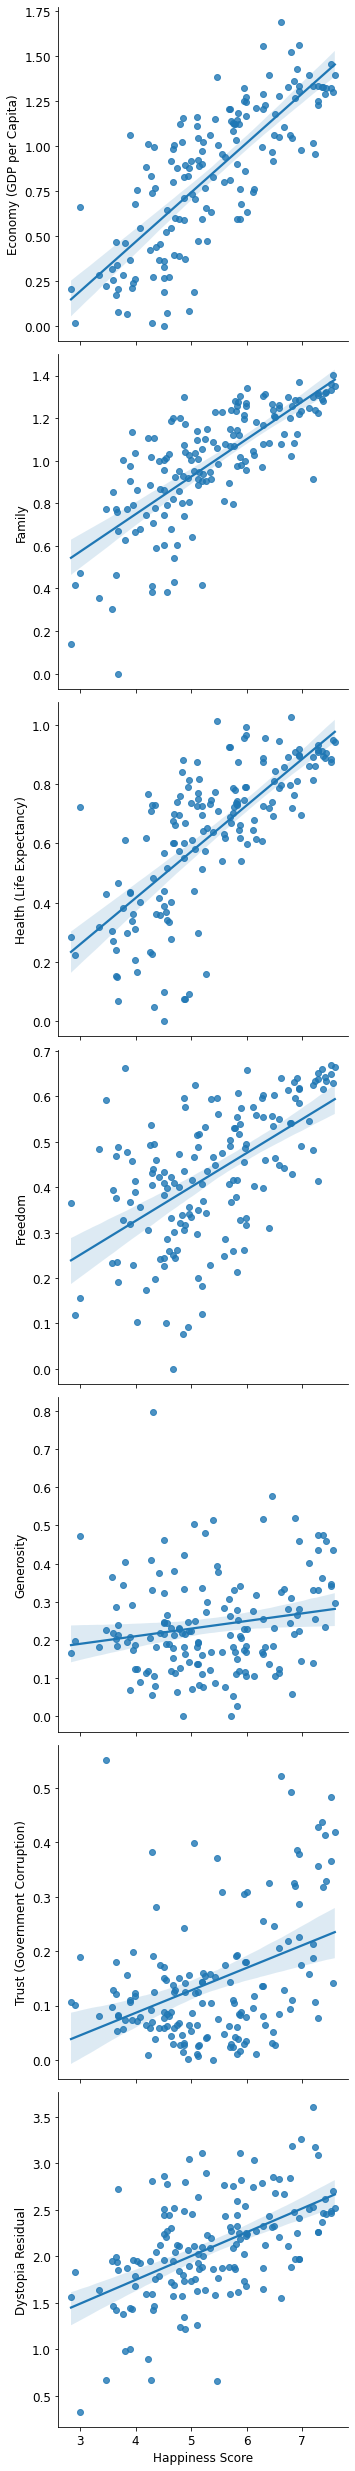

In [55]:
fig=plt.figure(figsize=(6,6));
sns.pairplot(data=worldhappiness, kind='reg', size = 5,x_vars=['Happiness Score'],y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)','Freedom', 'Generosity','Trust (Government Corruption)','Dystopia Residual'])                

There is a positive relationship between happiness score and Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom, Generosity,Trust (Government Corruption),Dystopia Residual but  Economy, Health and Freedom are the major drivers of world happiness score.

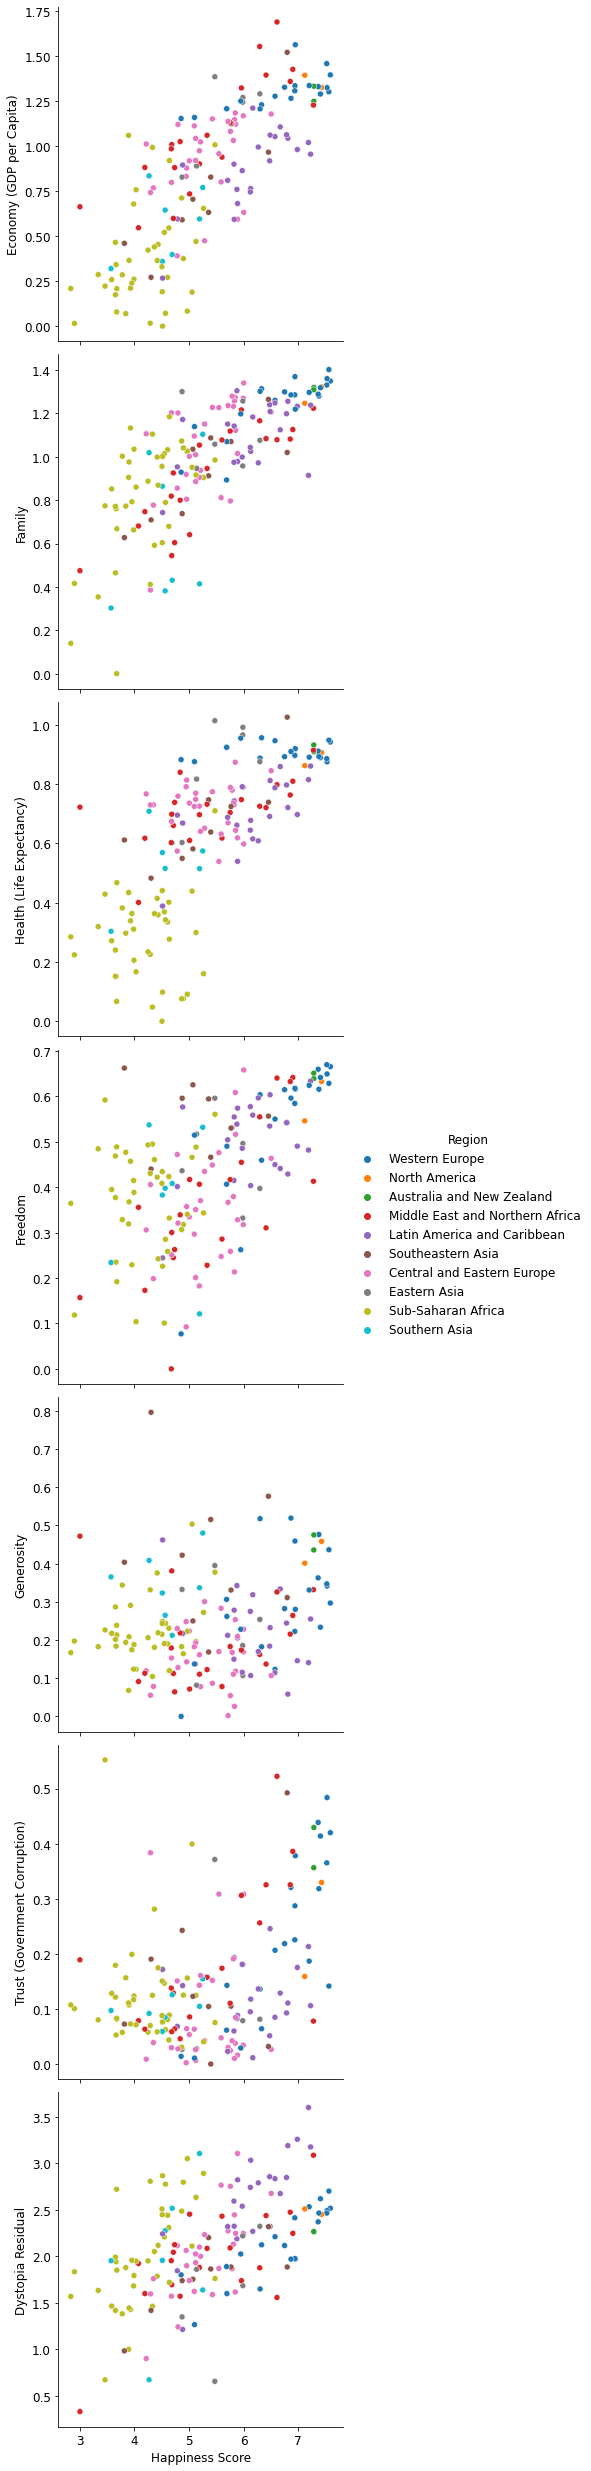

In [58]:
sns.pairplot(data=worldhappiness, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity','Trust (Government Corruption)','Dystopia Residual'])

In [59]:
worldhappiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(worldhappiness.columns)):
    worldhappiness[worldhappiness.columns[column]]=le.fit_transform(worldhappiness[worldhappiness.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

In [61]:
mappings

[{0: 'Afghanistan',
  1: 'Albania',
  2: 'Algeria',
  3: 'Angola',
  4: 'Argentina',
  5: 'Armenia',
  6: 'Australia',
  7: 'Austria',
  8: 'Azerbaijan',
  9: 'Bahrain',
  10: 'Bangladesh',
  11: 'Belarus',
  12: 'Belgium',
  13: 'Benin',
  14: 'Bhutan',
  15: 'Bolivia',
  16: 'Bosnia and Herzegovina',
  17: 'Botswana',
  18: 'Brazil',
  19: 'Bulgaria',
  20: 'Burkina Faso',
  21: 'Burundi',
  22: 'Cambodia',
  23: 'Cameroon',
  24: 'Canada',
  25: 'Central African Republic',
  26: 'Chad',
  27: 'Chile',
  28: 'China',
  29: 'Colombia',
  30: 'Comoros',
  31: 'Congo (Brazzaville)',
  32: 'Congo (Kinshasa)',
  33: 'Costa Rica',
  34: 'Croatia',
  35: 'Cyprus',
  36: 'Czech Republic',
  37: 'Denmark',
  38: 'Djibouti',
  39: 'Dominican Republic',
  40: 'Ecuador',
  41: 'Egypt',
  42: 'El Salvador',
  43: 'Estonia',
  44: 'Ethiopia',
  45: 'Finland',
  46: 'France',
  47: 'Gabon',
  48: 'Georgia',
  49: 'Germany',
  50: 'Ghana',
  51: 'Greece',
  52: 'Guatemala',
  53: 'Guinea',
  54: 'Ha

In [63]:
worldhappiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,0,156,19,151,154,148,156,150,115,125
1,58,9,1,155,100,136,157,150,143,98,144,134
2,37,9,2,154,16,139,155,128,151,153,129,122
3,105,9,3,153,50,153,152,132,157,143,132,118
4,24,5,4,152,26,140,151,140,145,141,145,116


In [64]:
#Let's check for outliers
from scipy.stats import zscore
z_score=abs(zscore(worldhappiness))
print(worldhappiness.shape)
happiness_final=worldhappiness.loc[(z_score<3).all(axis=1)]
print(happiness_final.shape)

(158, 12)
(158, 12)


In [65]:
worldhappiness.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                  -0.001271
Happiness Score                  0.001271
Standard Error                   0.002827
Economy (GDP per Capita)         0.000000
Family                           0.000000
Health (Life Expectancy)        -0.007319
Freedom                          0.000000
Trust (Government Corruption)   -0.009927
Generosity                       0.000000
Dystopia Residual                0.000000
dtype: float64

In [66]:
# Let's treat the skewness
for col in worldhappiness.columns:
    if worldhappiness.skew().loc[col]>0.5:
        worldhappiness[col]=np.log1p(worldhappiness[col])

In [67]:
worldhappiness.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                  -0.001271
Happiness Score                  0.001271
Standard Error                   0.002827
Economy (GDP per Capita)         0.000000
Family                           0.000000
Health (Life Expectancy)        -0.007319
Freedom                          0.000000
Trust (Government Corruption)   -0.009927
Generosity                       0.000000
Dystopia Residual                0.000000
dtype: float64

In [68]:
#Let's split the data into 'x' independent and 'y' dependent variables
x = worldhappiness.drop(['Happiness Score'],axis=1)
y = worldhappiness['Happiness Score']

In [69]:
#Let's split the data into 'x' independent and 'y' dependent variables
x = worldhappiness.drop(['Happiness Score'],axis=1)
y = worldhappiness['Happiness Score']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [70]:
#First let's scle our model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [71]:
#Using different models
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

classifiers = [
    SGDRegressor(max_iter=100000),
    LinearSVR(max_iter=100000),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
]

In [72]:
#Evaluating scores by cross-validation
from sklearn.model_selection import cross_val_score
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    scores = cross_val_score(clf, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print("Mean: ", scores.mean())
    print("Std deviation: ", scores.std())
    
print("="*30)

SGDRegressor
Mean:  -0.9649062399230075
Std deviation:  0.48511523803532636
LinearSVR
Mean:  -80.8625338665958
Std deviation:  35.6933727747228
DecisionTreeRegressor
Mean:  -12.772727272727273
Std deviation:  5.077457878938701
RandomForestRegressor
Mean:  -2.9757272727272714
Std deviation:  1.2513656710415055


In [73]:
#We will use Grid Search to get best settings(estimator) for Random Forest Regression
from sklearn.model_selection import GridSearchCV
#param_grid is for our settings lets see what fits the best
param_grid = [
    {'n_estimators': [3, 10, 30,50,100,200,300]},
      ]
rnd_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rnd_reg, param_grid, cv=10,scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'n_estimators': [3, 10, 30, 50, 100, 200, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [74]:
grid_search.best_params_

{'n_estimators': 300}

In [75]:
#Predictions on best Parameters
best_reg = grid_search.best_estimator_
y_pred = best_reg.predict(x_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mae=mean_absolute_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
print("Final MAE:",final_mae)
print("Final MSE:",final_mse)
print("Final RMSE:",final_rmse)

Final MAE: 1.001180555555556
Final MSE: 1.525428935185187
Final RMSE: 1.2350825620925863
